In [3]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt

with h5py.File('../../CodePass2/runs/finale.hdf5', 'r') as f:
    # read the data
    x = f['x'][:]
    properties = f['properties'][:][0]
    p = f['p'][:]

In [4]:
gb_left = np.logical_and(properties == 1, x[0,:,1] < 0)

(-76.01607761383056, 58.47767505645752, -25.64211187362671, 25.65928373336792)

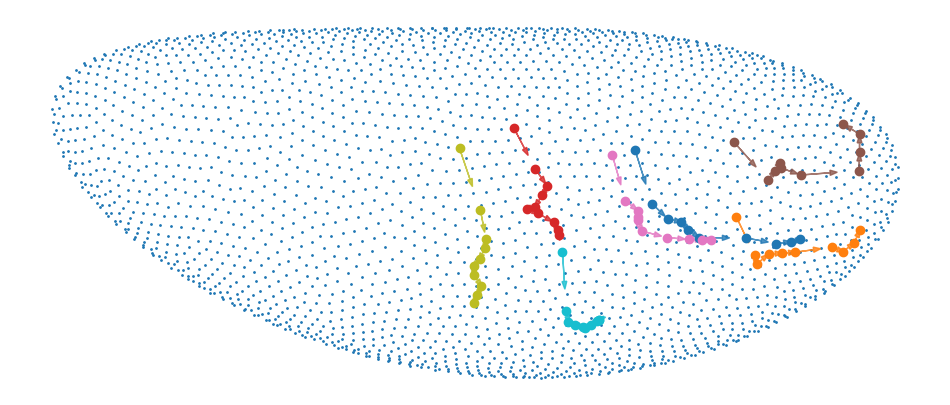

In [5]:
# make 10 time steps
ts = np.linspace(1,x.shape[0]-1, 10,).astype(int)

# get 5 random particles in gb
gb_particles = np.where(gb_left)[0]
gb_particles = np.random.choice(gb_particles, 5)
best_gb = [3367, 4537, 498, 1994, 1735, 2856, 567]

y = x[0,:,1]

plt.figure(figsize=(12,5))
plt.scatter(x[0,:,0][y < 0], x[0,:,2][y < 0], s = 1)

# plt.show()
# make 7 distinct colors

from matplotlib import cm
cols = cm.tab10(np.linspace(0,1,7))

# for t in ts:
    # plt.figure(figsize=(10,5))
    # plt.scatter(x[t,:,0][y < 0], x[t,:,2][y < 0])
for i in range(len(best_gb)):
    p, c = best_gb[i], cols[i]
    plt.plot(x[ts,p,0], x[ts,p,2], 'o', c =c , alpha =1)
    # make an arrowfrom each point to halfway between the next point
    for j in range(len(ts)-1):
        halfway = (x[ts[j],p] + x[ts[j+1],p])/2
        plt.arrow(x[ts[j],p,0], x[ts[j],p,2], halfway[0] - x[ts[j],p,0], halfway[2] - x[ts[j],p,2], color = c, alpha = 0.8, head_width = 0.7)
    # plt.show()
# remove the axes
plt.axis('off')

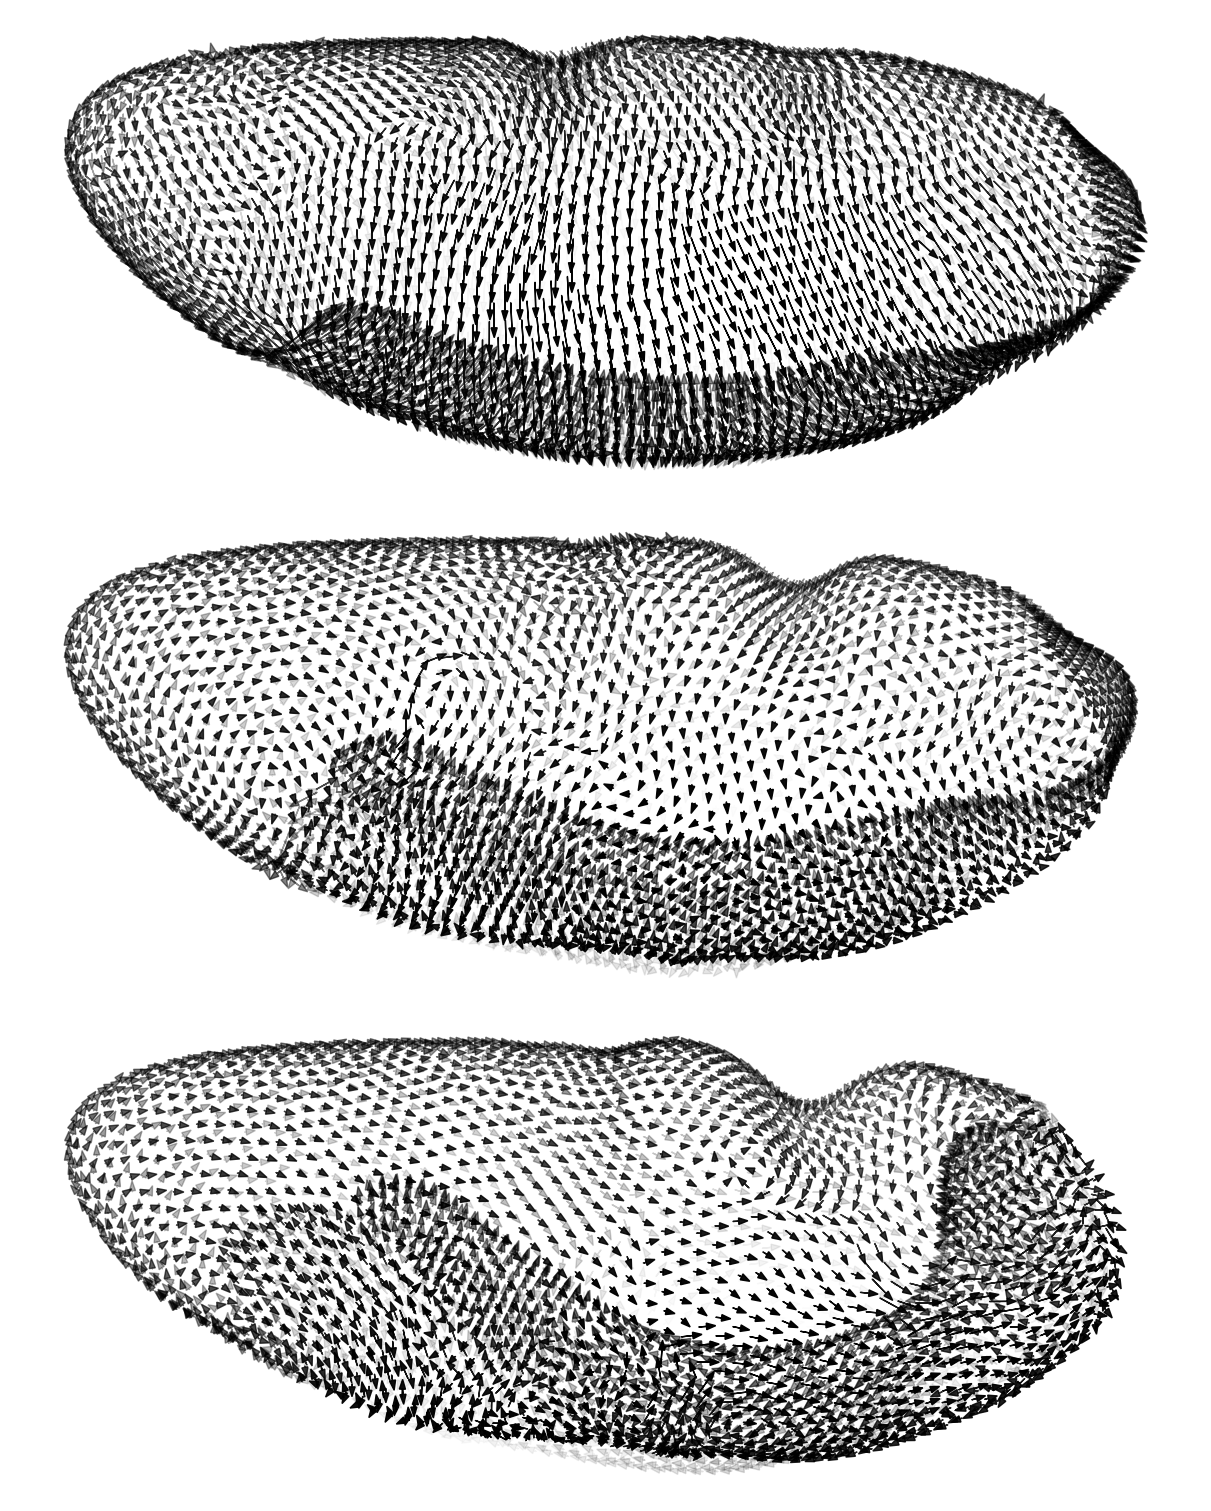

In [7]:


fig, axs = plt.subplots(3, 1, figsize=(12,3*5), constrained_layout=True, sharex=True, sharey=True)

axs = axs.flatten()
since = 70
axind = 0
for t in ts[1::3]:
    if t == 0:
        continue
    t -= 200
    movements_since_last = x[t] - x[t-since]

    # for each particle, draw an arrow showing the movement since last
    for cell in range(x.shape[1]):
        if y[cell] > -100:
            axs[axind].arrow(x[t-since,cell,0], x[t-since,cell,2], movements_since_last[cell,0], movements_since_last[cell,2], color = 'black', alpha = np.minimum(np.abs(y[cell]+23.4)/(23.4*2) + 0.0, 1), head_width = 0.7)
    

    # remove the axes
    axs[axind].axis('off')
    axind += 1

plt.show()

In [8]:
import pandas as pd
import numpy as np

stas = pd.read_csv('../../DeconstructingGastrulation-Data/tracked_data_rescaled.csv')

stas.head()

Unnamed: 0.1  Unnamed: 0         x          y         z  frame  particle  \
0             0           0 -4.739862 -26.555828  0.309946      1         0   
1             1           1 -4.811905 -26.555293  0.320071      1         1   
2             2           2 -5.964577 -26.535062  0.482068      1         2   
3             3           3 -5.947833 -26.517885  2.169408      1         3   
4             4           4 -6.439664 -26.571131  1.283488      1         4   

   dx  dy  dz  
0 NaN NaN NaN  
1 NaN NaN NaN  
2 NaN NaN NaN  
3 NaN NaN NaN  
4 NaN NaN NaN

In [9]:
print(x[0].min(), stas.x.min())
print(x[0].max(), stas.x.max())

# rotate the stas data 45 degrees around y
rot  = 0.055
stas['x_rot'] = stas.x*np.cos(rot) - stas.z*np.sin(rot)
stas['z_rot'] = stas.x*np.sin(rot) + stas.z*np.cos(rot)
stas['y_rot'] = stas.y


-69.902725 -79.21731966161327
52.40632 60.94438451825841


In [28]:
ts[::3][1:]

array([1000, 2000, 3000])

5152
5170
5022


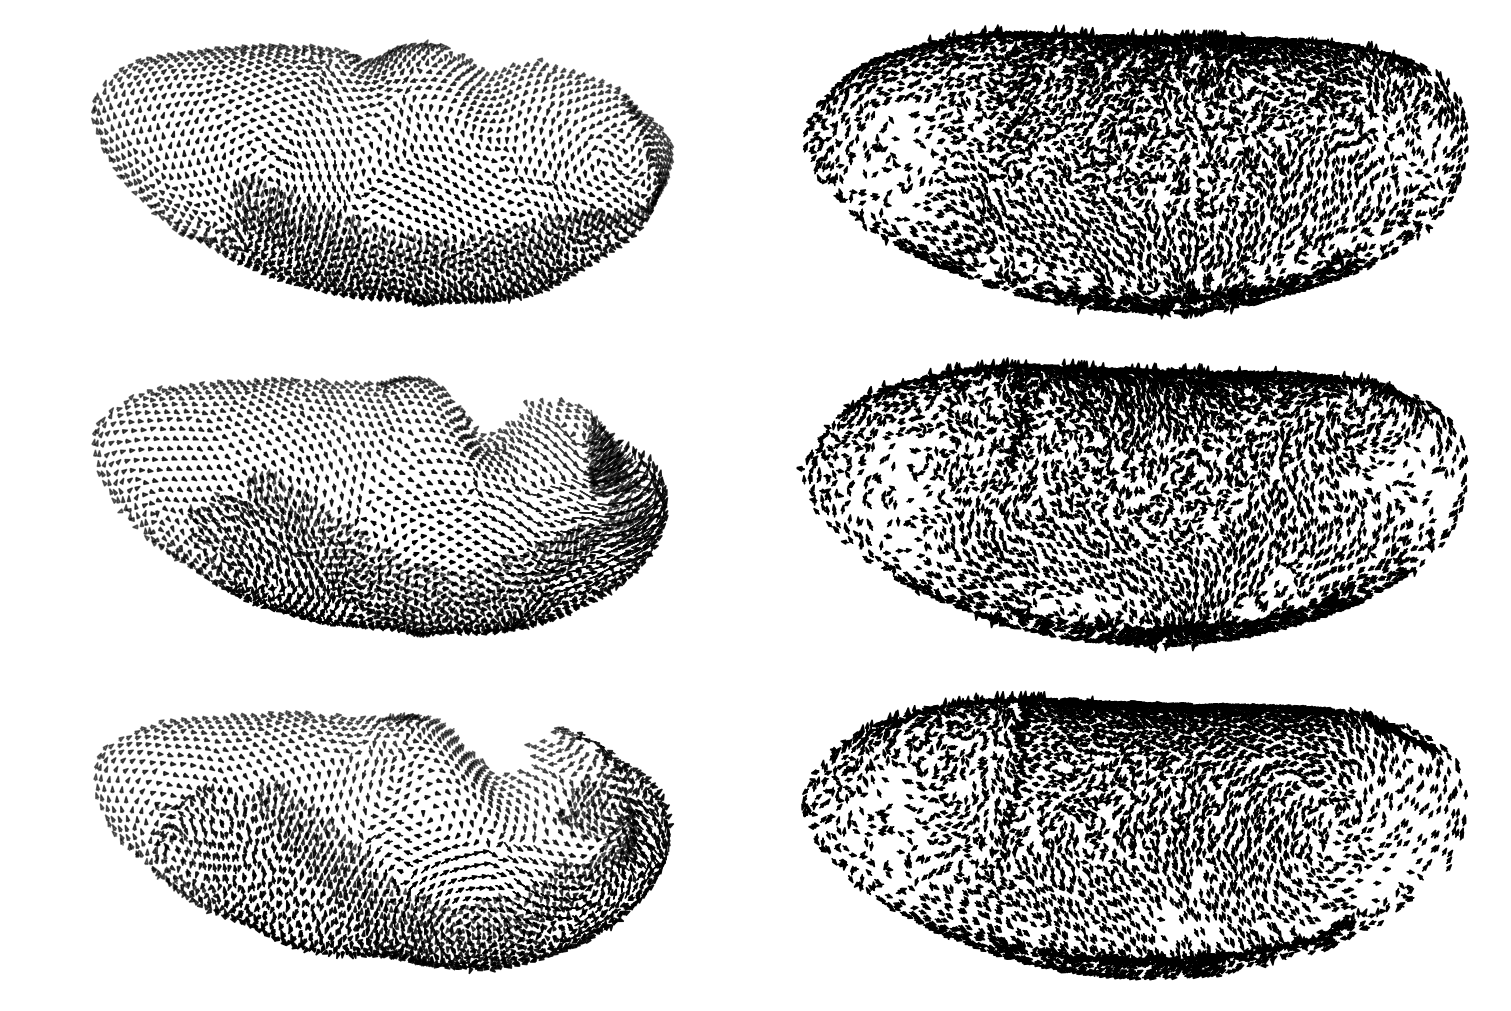

In [14]:

fig, axs = plt.subplots(3, 2, figsize=(15,10), constrained_layout=True, sharex=True, sharey=True)

axs_left = [axs[0,0], axs[1,0], axs[2,0]]
axs_right = [axs[0,1], axs[1,1], axs[2,1]]
since = 70
axind = 0


for t in [0]
    if t == 0:
        continue
    t -= 200
    movements_since_last = x[t] - x[t-since]

    # for each particle, draw an arrow showing the movement since last
    for cell in range(x.shape[1]):
        if y[cell] > 2:
            axs_left[axind].arrow(x[t-since,cell,0], x[t-since,cell,2], movements_since_last[cell,0], movements_since_last[cell,2], color = 'black', alpha = np.minimum(np.abs(y[cell]+23.4)/(23.4*2) + 0.0, 1), head_width = 0.7)
    
    

    # remove the axes
    axs_left[axind].axis('off')
    axind += 1


axind = 0
for i in [3, 5, 10]:
    # for cell in stas[stas.frame == 10]:
    wh = stas[stas.frame == i].y < 0
    xx, zz = stas[stas.frame == i][wh].x_rot, stas[stas.frame == i][wh].z_rot
    dx, dz = stas[stas.frame == i][wh].dx, stas[stas.frame == i][wh].dz
    # normalize the vectors
    norm = np.sqrt(dx**2 + dz**2)
    dx = dx/norm*0.5
    dz = dz/norm*0.5
    for j in range(len(xx)):
        axs_right[axind].arrow(xx.iloc[j], zz.iloc[j], dx.iloc[j], dz.iloc[j], color = 'black', alpha = 1, head_width = 0.7)
    # axs_right[axind].quiver(xx, zz, dx, dz, color = 'black', alpha = 1., headwidth = 3., )
    print(len(xx))
    axs_right[axind].axis('off')
    axind += 1

plt.show()


In [254]:
# find sim movement vectors

sim_step_size = 200

sim_dirs = np.empty((x.shape[0]-sim_step_size, x.shape[1], 3))
sim_poss = np.empty((x.shape[0]-sim_step_size, x.shape[1], 3))  
for t in range(x.shape[0]-sim_step_size):
    dir = x[t+sim_step_size] - x[t]
    dir = dir/np.linalg.norm(dir, axis = 1)[:,None]
    sim_dirs[t] = dir
    sim_poss[t] = x[t+sim_step_size]

# find the stas movement vectors
stas_dirs = -np.ones((len(np.unique(stas.frame)),11000,3))*9999
stas_poss = -np.ones((len(np.unique(stas.frame)),11000,3))*9999
for i, frame in enumerate(np.unique(stas.frame)):
    dirs = np.array([stas[stas.frame == frame].dx, stas[stas.frame == frame].dy, stas[stas.frame == frame].dz]).T

    lens = np.linalg.norm(dirs, axis = 1)
    lens[lens == 0] = 1
    dirs = dirs/lens[:,None]
    
    stas_dirs[i][:len(dirs)] = dirs

    poss = np.array([stas[stas.frame == frame].x_rot, stas[stas.frame == frame].y_rot, stas[stas.frame == frame].z_rot]).T

    stas_poss[i][:len(poss)] = poss


# Compare the data

In [132]:
stas_poss.shape

(59, 11000, 3)

In [260]:
scale = int(sim_poss.shape[0]/100)

iiis = list(range(0, 40))
overlaps = np.empty((len(iiis), len(sim_poss[0])))
avg_compared_dirs = np.empty((len(iiis), len(sim_poss[0]), 3))
for ind, iii in enumerate(iiis):

    sim_t = iii*scale
    stas_t = iii +1

    overlap = np.empty((len(sim_poss[sim_t])))
    for cell_id, (pos, dir) in enumerate(zip(sim_poss[sim_t], sim_dirs[sim_t])):
        found = False
        dist = 3
        print(f"{ind/len(iiis):.3}\n{cell_id/len(sim_poss[sim_t]):.3}", end = "\r")
        while True:
            if dist > 50:
                print(dist, pos)

            
            
            # find the all stas particles within a certain distance
            dists = np.linalg.norm(stas_poss[stas_t] - pos, axis = 1)

            closest = np.where(dists < dist)[0]


            dirs = stas_dirs[stas_t][closest]

            # remove nans
            
            dirs = dirs[~np.isnan(dirs)]

            if len(dirs) < 1:
                dist += 0.5
                continue
            
            avg_dir = np.mean(dirs, axis = 0)
            avg_compared_dirs[ind][cell_id] = avg_dir

            dot = np.dot(dir, avg_dir)

            break

               

        # find the angle between the sim dir and the stas dir
        angles = np.arccos(dot)

        overlap[cell_id] = np.mean(angles)
    overlaps[ind] = overlap

0.0
0.0
0.0002
0.0004
0.0006
0.0008
0.001
0.0012
0.0014
0.0016
0.0018
0.002
0.0022
0.0024
0.0026
0.0028
0.003
0.0032
0.0034
0.0036
0.0038
0.004
0.0042
0.0044
0.0046
0.0048
0.005
0.0052
0.0054
0.0056
0.0058
0.006
0.0062
0.0064
0.0066
0.0068
0.007
0.0072
0.0074
0.0076
0.0078
0.008
0.0082
0.0084
0.0086
0.0088
0.009
0.0092
0.0094
0.0096
0.0098
0.01
0.0102
0.0104
0.0106
0.0108
0.011
0.0112
0.0114
0.0116
0.0118
0.012
0.0122
0.0124
0.0126
0.0128
0.013
0.0132
0.0134
0.0136
0.0138
0.014
0.0142
0.0144
0.0146
0.0148
0.015
0.0152
0.0154
0.0156
0.0158
0.016
0.0162
0.0164
0.0166
0.0168
0.017
0.0172
0.0174
0.0176
0.0178
0.018
0.0182
0.0184
0.0186
0.0188
0.019
0.0192
0.0194
0.0196
0.0198
0.02
0.0202
0.0204
0.0206
0.0208
0.021
0.0212
0.0214
0.0216
0.0218
0.022
0.0222
0.0224
0.0226
0.0228
0.023
0.0232
0.0234
0.0236
0.0238
0.024
0.0242
0.0244
0.0246
0.0248
0.025
0.0252
0.0254
0.0256
0.0258
0.026
0.0262
0.0264
0.0266
0.0268
0.027
0.0272
0.0274
0.0276
0.0278
0.028
0.0282
0.0284
0.0286
0.0288
0.029
0.0292
0

KeyboardInterrupt: 

In [243]:
# rech for random 
# 5000 random vectors

random_angles = np.empty((len(iiis), 5000))
for i in range(len(iiis)):
    iii = i*scale
    rand_dirs = np.random.rand(sim_dirs.shape[1], 3)*2. - 1.
    rand_dirs = rand_dirs/np.linalg.norm(rand_dirs, axis = 1)[:,None]

    dot = np.dot(sim_dirs[iii], rand_dirs.T)
    random_a = np.arccos(dot)
    random_angles[i] = np.mean(random_a, axis = 0)


0 8
1 8
2 8
3 8
4 8
5 8
6 8
7 8


C:\Users\jakob\AppData\Local\Temp\ipykernel_35288\701725035.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


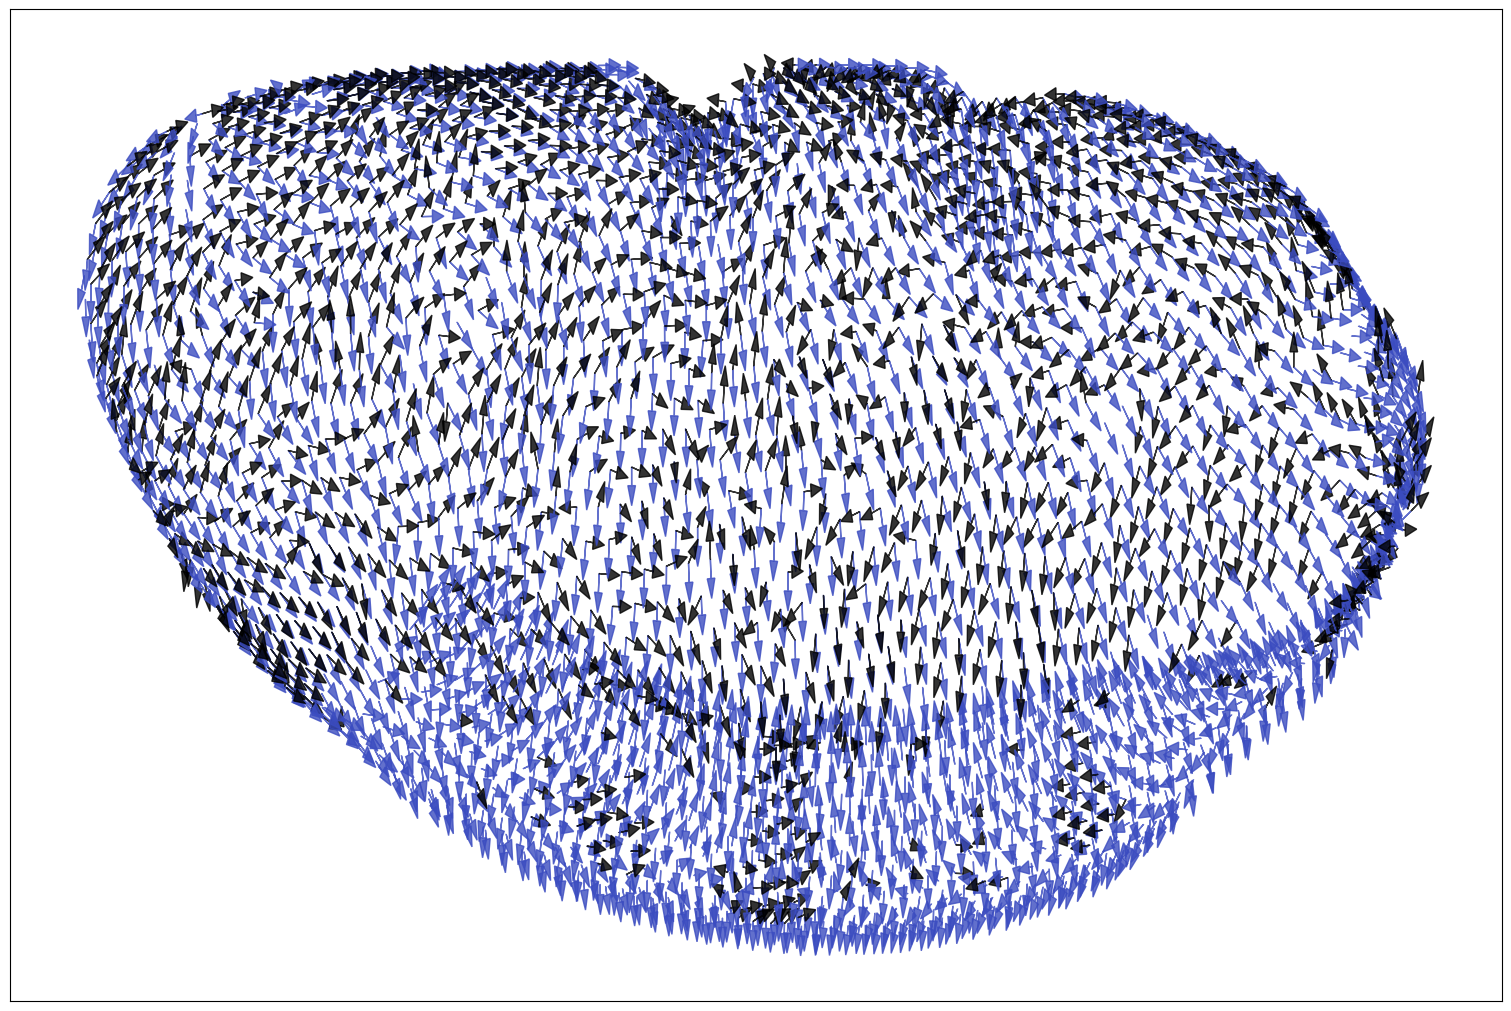

In [248]:
import numpy.ma as ma
# plottable = overlap.mean(axis = 1)
iiis = list([0,5,10,15,20,25,30,40])


# for ind in range(len(iiis)):
def make_inset_plot(iii, ax):
    over = overlaps[iii]
    
    sim_t = iii*scale
    stas_t = iii+1

    # plt.colorbar()
    
    sim_arrows = sim_dirs[sim_t]
    stas_arrows = stas_dirs[stas_t]

    # green to red
    cmap = plt.cm.get_cmap('coolwarm')

    # ax.scatter(sim_poss[sim_t][:,0][sim_poss[sim_t][:,1]>0], sim_poss[sim_t][:,2][sim_poss[sim_t][:,1]>0], c = over[sim_poss[sim_t][:,1]>0], cmap = cmap, s = 20)

    for cell_id, (pos, dir, stasdir) in enumerate(zip(sim_poss[sim_t], sim_dirs[sim_t], avg_compared[ind])):
        xx, yy, zz = pos

        if yy > 0:
            continue
        
        ax.arrow(pos[0], pos[2], dir[0], dir[2], color = cmap(over[cell_id]/np.pi), alpha = 0.8, head_width = 0.7)
        ax.arrow(pos[0], pos[2], stasdir[0], stasdir[2], color = "black", alpha = 0.8, head_width = 0.7)

    # ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])

    colorbar = plt.cm.ScalarMappable(cmap = cmap)
    return colorbar

fig, ax = plt.subplots(1, 1, figsize=(15,10), constrained_layout=True, sharex=True, sharey=True)

# for i, ax in enumerate(axs.flatten()):
#     make_inset_plot(i, ax)    

make_inset_plot(0,ax)

C:\Users\jakob\AppData\Local\Temp\ipykernel_35288\1655825148.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


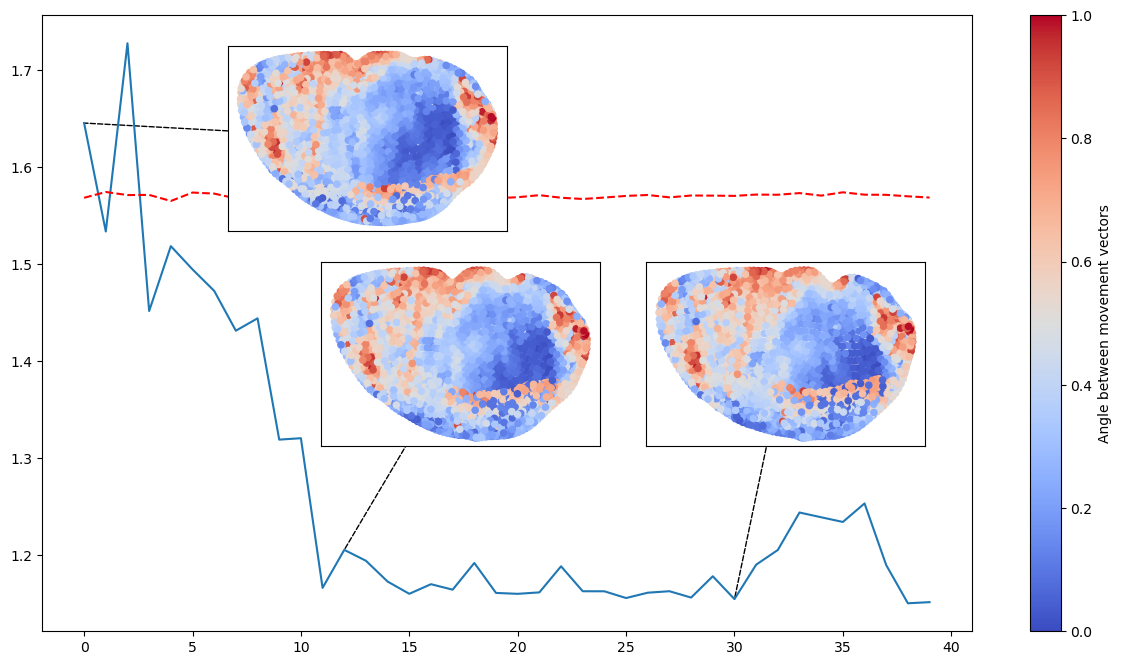

In [231]:
ymean = [np.mean(o[~np.isnan(o)]) for o in overlaps]
yerr = [np.std(o[~np.isnan(o)]) for o in overlaps]

fig, ax = plt.subplots(1, 1, figsize=(15,8))

ax.plot(ymean)
ax.plot([np.mean(r[~np.isnan(r)]) for r in random_angles], color = 'red', linestyle = '--')
y = [np.mean(r[~np.isnan(r)]) for r in random_angles]
yerr = [np.std(r[~np.isnan(r)]) for r in random_angles]
# plt.errorbar(list(range(len(y))), y, yerr = yerr, color = "red")


# make inset with
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

xposs = [0.2, 0.3, 0.65]
for i in range(len([0, 10, 30])):
    iii = [0,12,30][i]
    axins = ax.inset_axes([xposs[i], 0.65 if i == 0 else 0.3, 0.3, 0.3],)
    colorbar = make_inset_plot(iii, axins)
    cp1 = ConnectionPatch(xyA=(0.5, 0.5), xyB=(iii,ymean[iii]), coordsA="axes fraction", coordsB="data",
                        axesA=axins, axesB=ax, color="black", linestyle='--')
    # cp2 = ConnectionPatch(xyA=(0.5, 0.5), xyB=(0.5, 0.5), coordsA="axes fraction", coordsB="axes fraction",
    #                     axesA=axins, axesB=ax, color="black", linestyle='--')
    
    ax.add_artist(cp1)
    # ax.add_artist(cp2)

plt.colorbar(colorbar, ax = ax, label = 'Angle between movement vectors')